# Calibration curve

In [77]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

sys.path.append("../")
import paper_settings
from simulation.prior import get_grid_point

In [13]:
paper_settings.setup()

## Settings

In [81]:
i_show = 390 # 365
n_thetas = 100
skip = 10

get_grid_point(i_show)

array([ 0.125375, -1.875   ])

## Data

In [82]:
llr_raw = np.load("../data/results/llr_alices_full_sgd1e2_grid.npy")
llr_cal = np.load("../data/results/llr_calibrated_alices_full_sgd1e2_grid.npy")

In [83]:
theta_idx = np.random.choice(list(range(625)), n_thetas)  # list(range(625))

## Plot calibration curves

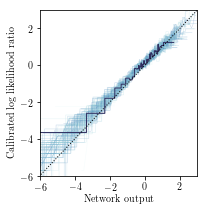

In [85]:
fig = paper_settings.figure()
ax = plt.gca()

for i in theta_idx:
    raw = llr_raw[i][::skip]
    cal = llr_cal[i][::skip]
    sorter = np.argsort(raw)
    raw = raw[sorter]
    cal = cal[sorter]
    color = paper_settings.CMAP1(0.5*np.random.random())
    plt.plot(raw, cal, alpha=0.3, c=color, lw=0.5)
    
raw = llr_raw[i_show][::skip]
cal = llr_cal[i_show][::skip]
sorter = np.argsort(raw)
raw = raw[sorter]
cal = cal[sorter]
color = paper_settings.CMAP1(0.8)
plt.plot(raw, cal, alpha=1., c=color, lw=1.)

plt.plot([-100.,100.], [-100.,100.], ls=":", c="black", lw=1.)
    
plt.xlim(-6., 3.)
plt.ylim(-6., 3.)

plt.xlabel(r"Network output")
plt.ylabel(r"Calibrated log likelihood ratio")
ax.xaxis.set_label_coords(0.5, -0.11)
    
plt.savefig("../figures/calibration_curves.pdf", dpi=300)
